!pip install finlab_crypto > log.txt
!pip install talib-binary > log.txt

In [1]:
!pip install finlab_crypto > log.txt #--ignore-installed llvmlite
import finlab_crypto
finlab_crypto.setup()

/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


Matplotlib created a temporary config/cache directory at /tmp/matplotlib-_z_zxz52 because the default path (/home/ubuntu/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is dep

All caught up..!


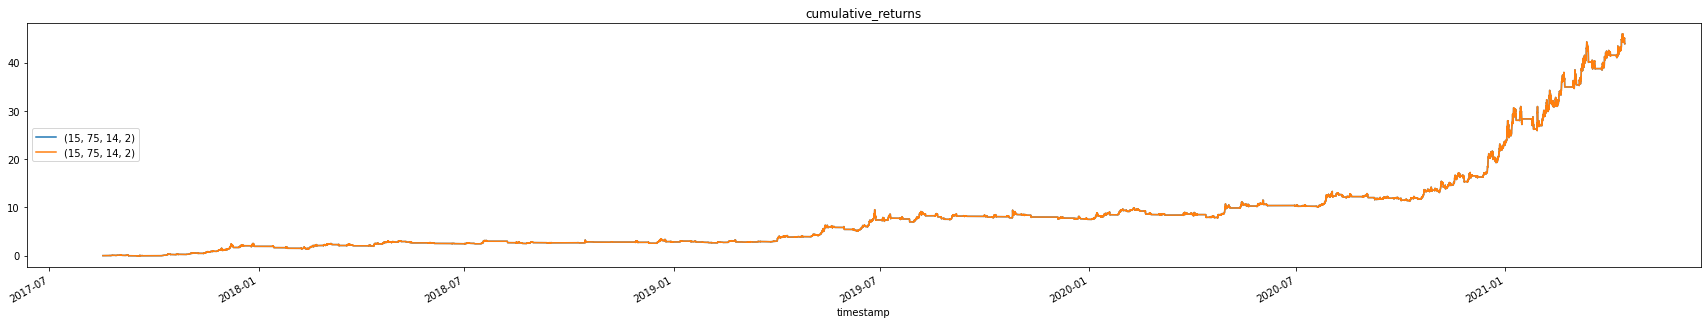

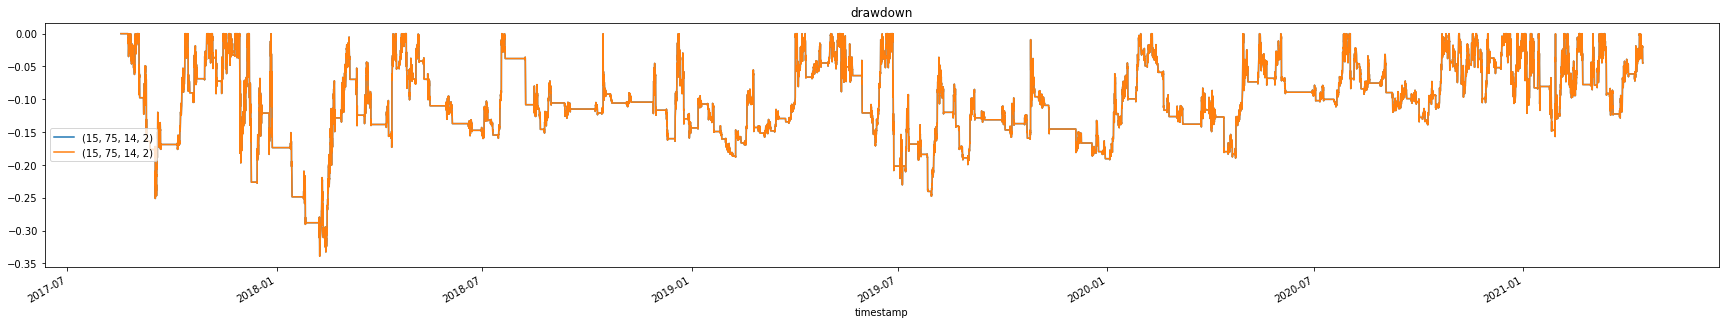

In [3]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
import talib
import matplotlib.pyplot as plt
import numpy as np
from finlab_crypto import Strategy
#################################################################################################
@Strategy(timeperiod=14,sma1=20,sma2=60,sma3=240,sma4=240,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean() 

  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) & (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) 
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures
#################################################################################################
variables = {'sma1': 15,
             'sma2': 75,
             'n':14,
             'm':2
             }
a1 = sar_strategy.backtest(ohlcv, variables=variables , freq='1h', plot=False)
#################################################################################################
d=15
f=75
g=14
h=2
variables = {'sma1': d,
             'sma2': f,
             'n': g,
             'm': h
             }
a2 = sar_strategy.backtest(ohlcv, variables=variables , freq='1h', plot=False)
#################################################################################################
plt.figure(figsize=(30,5))
a1.cumulative_returns().plot()
a2.cumulative_returns().plot()
plt.legend([(15,75,14,2),(d,f,g,h)],loc=6)
plt.title("cumulative_returns")
plt.show()

plt.figure(figsize=(30,5))
a1.drawdown().plot()
a2.drawdown().plot()
plt.legend([(15,75,14,2),(d,f,g,h)],loc=6)
plt.title("drawdown")
plt.show()

In [16]:
ohlcv = finlab_crypto.crawler.get_all_binance('ETHUSDT', '1h')
import talib
import numpy as np
from finlab_crypto import Strategy

@Strategy(timeperiod=14,sma1=20,sma2=60,sma3=240,sma4=240,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean()
  

  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) #& (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) 
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures

variables = {'sma1': np.arange(1,50,1),
             'sma2': np.arange(50,100,1),
             
             #'n':np.arange(1,20,1),
             'm':2
             }

s = sar_strategy.backtest(ohlcv, variables=variables , freq='1h', plot=False)
ss = s.final_value()
ss.nlargest(20)

All caught up..!


  0%|          | 0/2450 [00:00<?, ?it/s]

sma1  sma2  m
28    76    2    5416.900887
      77    2    5242.044834
27    77    2    5214.415488
28    75    2    5143.181208
16    90    2    5080.073582
      92    2    5004.607726
27    76    2    4996.502907
20    85    2    4781.000197
21    87    2    4752.466257
28    79    2    4736.356809
27    79    2    4733.676166
18    89    2    4703.542430
27    78    2    4701.750437
15    88    2    4690.946389
16    91    2    4687.352346
      88    2    4600.034852
21    83    2    4594.942867
16    89    2    4534.677319
15    89    2    4531.729313
19    85    2    4513.395212
dtype: float64

All caught up..!


  0%|          | 0/900 [00:00<?, ?it/s]

/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages

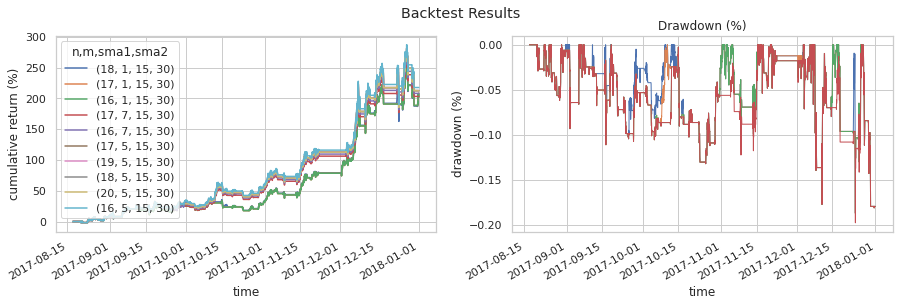

/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages

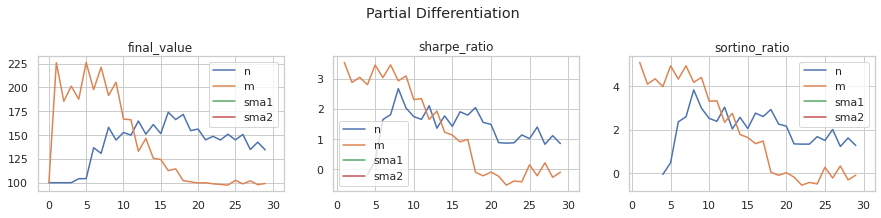

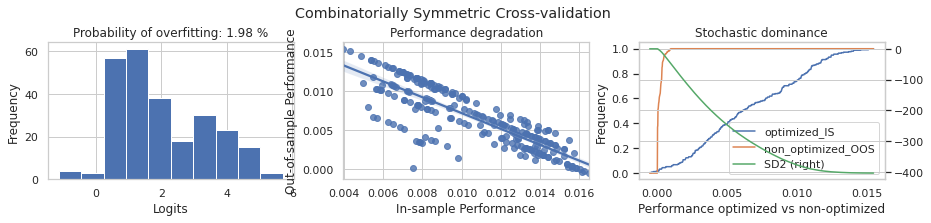

Output()

In [7]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
import talib
import numpy as np
from finlab_crypto import Strategy

@Strategy(timeperiod=14,sma1=20,sma2=60,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean()
  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()
  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) & (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) #& (mmi < 0.5)
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures

variables = {'sma1': 15,
             'sma2': 30,
             'n':np.arange(0,30,1),
             'm':np.arange(0,30,1)
             }

sar_strategy.backtest(ohlcv.loc['2017'], variables=variables , freq='1h', plot=True)

All caught up..!


  0%|          | 0/9801 [00:00<?, ?it/s]

/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages

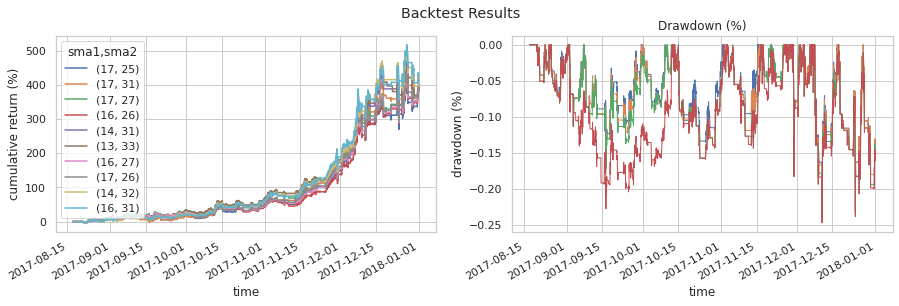

/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:331: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():
/home/ubuntu/tensorflow/anaconda3/lib/python3.7/site-packages

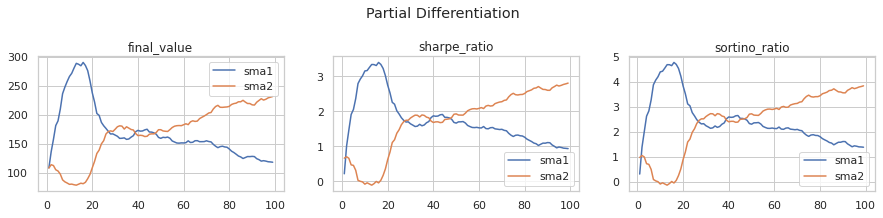

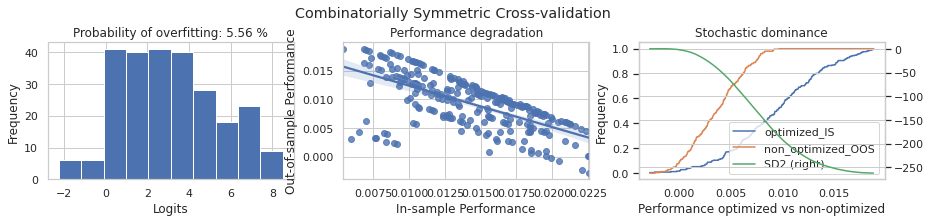

Output()

In [8]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
import talib
import numpy as np
from finlab_crypto import Strategy

@Strategy(timeperiod=14,sma1=20,sma2=60,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean()
  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()
  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) #& (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) #& (mmi < 0.5)
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures

variables = {'sma1': np.arange(1,100,1),
             'sma2': np.arange(1,100,1),
#              'n':np.arange(0,30,1),
#              'm':np.arange(0,30,1)
             }

sar_strategy.backtest(ohlcv.loc['2017'], variables=variables , freq='1h', plot=True)

All caught up..!


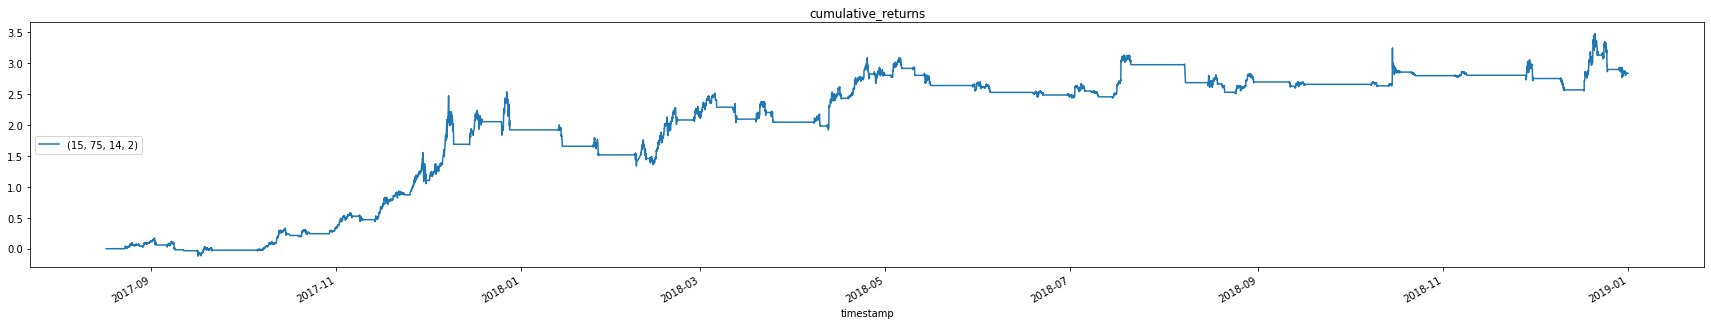

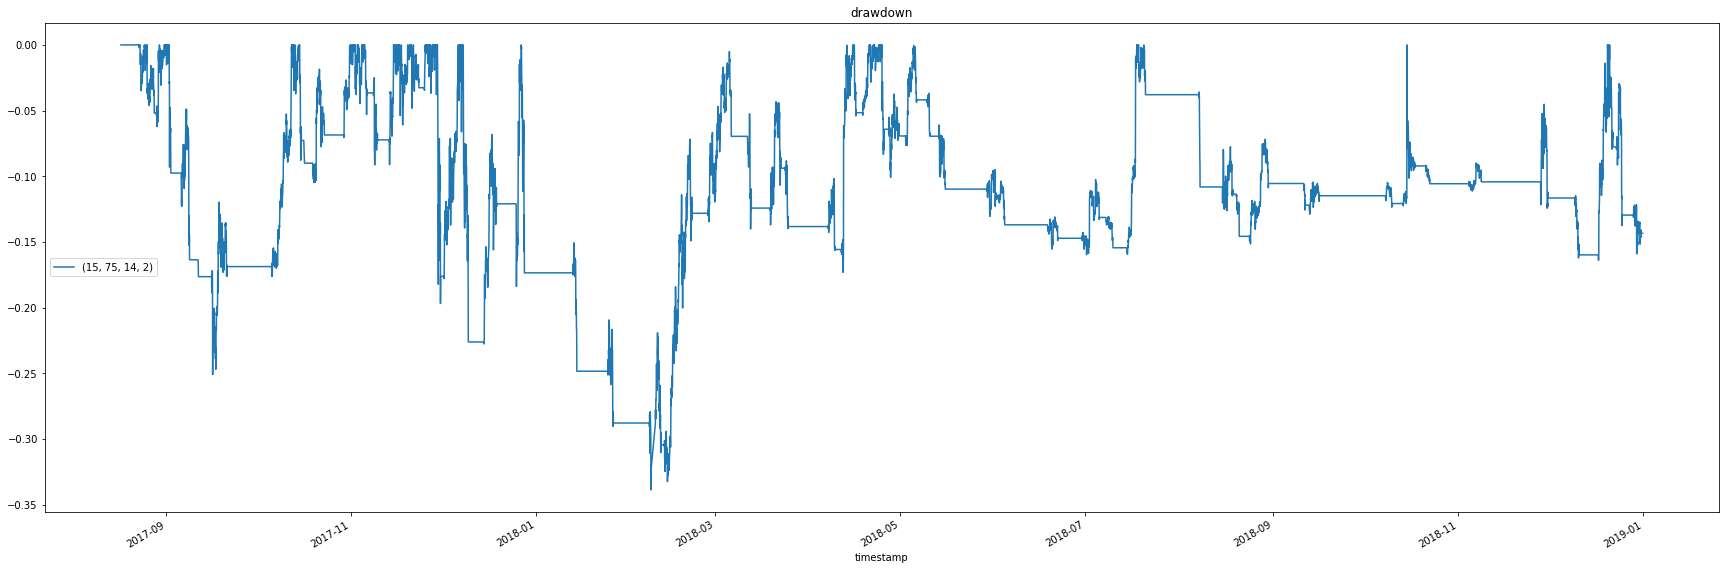

In [7]:
ohlcv = finlab_crypto.crawler.get_all_binance('BTCUSDT', '1h')
import talib
import matplotlib.pyplot as plt
import numpy as np
from finlab_crypto import Strategy
#################################################################################################
@Strategy(timeperiod=14,sma1=20,sma2=60,sma3=240,sma4=240,n=20,m=40)
def sar_strategy(ohlcv):
  close = ohlcv.close
  sma20 = close.rolling(sar_strategy.sma1).mean()
  sma60 = close.rolling(sar_strategy.sma2).mean() 

  median = ohlcv.close.rolling(sar_strategy.n).median()
  p1 = ohlcv.close > median
  p2 = ohlcv.close.shift() > median
  mmi = (p1 & p2).astype(int).rolling(sar_strategy.m).mean()

  entries = (sma20 > sma60) & (sma20.shift() < sma60.shift()) & (mmi > 0.5)
  exits = (sma20 < sma60) & (sma20.shift() > sma60.shift()) 
  figures = {'overlaps': {'sma20': sma20, 'sma60': sma60}}
  return entries, exits, figures
#################################################################################################
variables = {'sma1': 15,
             'sma2': 75,
             'n':14,
             'm':2
             }
a1 = sar_strategy.backtest(ohlcv.loc[:'2018'], variables=variables , freq='1h', plot=False)
#################################################################################################
plt.figure(figsize=(30,5))
a1.cumulative_returns().plot()
plt.legend([(15,75,14,2),(d,f,g,h)],loc=6)
plt.title("cumulative_returns")
plt.show()

plt.figure(figsize=(30,10))
a1.drawdown().plot()
plt.legend([(15,75,14,2),(d,f,g,h)],loc=6)
plt.title("drawdown")
plt.show()